## Importar las Librerias necesarias



In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation



##Conexión con el drive para acceder al dataset

##Lectura de archivo de excel

In [10]:
ruta_archivo = 'Canciones2.xlsx'
df = pd.read_excel(ruta_archivo)

# Muestra las primeras filas del dataframe
df.head()

,Año,Canción,Artista,PlayList,Letra
0,2010,Hasta Abajo,Don Omar,Latin Hits 2010 by Spotify,"D, d, d\nAsí hasta abajo soy yo (D, d, d, D. O..."
1,2010,Niña Bonita,Chino & Nacho,Latin Hits 2010 by Spotify,Richi peña\nChino y nacho\nEsta cancion nació ...
2,2010,Como Has Logrado,Vicente Garcia,Latin Hits 2010 by Spotify,La esperanza se marchó\nMas bien me abandonó\n...
3,2010,Taboo,Don Omar,Latin Hits 2010 by Spotify,Bahía Azulada)\nNo llores por él\n(No llores p...
4,2010,Me Enamoré,Angel y Khriz,Latin Hits 2010 by Spotify,"Hola que tal, como estas? que te trae por aqui..."


##Descarga de las stopwords en español

In [11]:
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Definición de función de limpieza y Aplicación de la limpieza al dataframe

In [12]:
def clean_text(text):
    # Eliminar caracteres especiales y números
    text = re.sub(r'\n|\r', ' ', text)  # Quitar saltos de línea
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', text)  # Dejar solo letras
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in spanish_stopwords])
    return text

df['Letra_limpia'] = df['Letra'].apply(clean_text)


In [13]:
df.head()

,Año,Canción,Artista,PlayList,Letra,Letra_limpia
0,2010,Hasta Abajo,Don Omar,Latin Hits 2010 by Spotify,"D, d, d\nAsí hasta abajo soy yo (D, d, d, D. O...",d d d así abajo d d d d así abajo dj eliel cas...
1,2010,Niña Bonita,Chino & Nacho,Latin Hits 2010 by Spotify,Richi peña\nChino y nacho\nEsta cancion nació ...,richi peña chino nacho cancion nació pensamien...
2,2010,Como Has Logrado,Vicente Garcia,Latin Hits 2010 by Spotify,La esperanza se marchó\nMas bien me abandonó\n...,esperanza marchó mas bien abandonó entonces ca...
3,2010,Taboo,Don Omar,Latin Hits 2010 by Spotify,Bahía Azulada)\nNo llores por él\n(No llores p...,bahía azulada llores llores llorando día hizo ...
4,2010,Me Enamoré,Angel y Khriz,Latin Hits 2010 by Spotify,"Hola que tal, como estas? que te trae por aqui...",hola tal trae aqui hablo verdad dijo asi olvid...


##Transformación de textos a TF-IDF

In [14]:
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['Letra_limpia'])

In [15]:
print(tfidf_matrix)

  (0, 68)	0.328456918839292
  (0, 0)	0.5688521487224473
  (0, 343)	0.1778252209007733
  (0, 185)	0.027407512524649687
  (0, 774)	0.3033679119419285
  (0, 822)	0.3242850081267631
  (0, 879)	0.26224463621663063
  (0, 1087)	0.16390289763539412
  (0, 140)	0.08532782230836708
  (0, 338)	0.13112231810831532
  (0, 754)	0.12420335321313865
  (0, 139)	0.09315251490985399
  (0, 915)	0.13112231810831532
  (0, 1267)	0.10503181145767407
  (0, 712)	0.07481686696403105
  (0, 273)	0.10503181145767407
  (0, 760)	0.10503181145767407
  (0, 195)	0.09834173858123649
  (0, 664)	0.10503181145767407
  (0, 645)	0.07703331390256657
  (0, 52)	0.10503181145767407
  (0, 727)	0.09834173858123649
  (0, 779)	0.08891261045038665
  (0, 991)	0.10503181145767407
  (0, 347)	0.03278057952707883
  :	:
  (99, 562)	0.05708664270522764
  (99, 326)	0.12466637270753153
  (99, 76)	0.18752305154087107
  (99, 907)	0.2789110972326623
  (99, 1249)	0.2922113073936446
  (99, 1170)	0.2854332135261382
  (99, 843)	0.06448123065962745
  (9

# **NMF**

##Modelado de tópicos usando NMF

In [16]:
n_topics = 10
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

##Extracción de palabras clave para cada tópico en NMF

In [17]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 15
topic_keywords = {}

for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Tópico {topic_idx}:")
    top_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(top_keywords)
    topic_keywords[topic_idx] = top_keywords

Tópico 0:
sé quieres si hago prefieres baby pa quédate dime quiere dice bebé diles hacerte toa
Tópico 1:
oh puedo contigo bailando ooh aquí dentro gustas loco ouh vayas feliz sabe encontrado esperé
Tópico 2:
na má sola gustas intento demás va loca da quiero novio disimular bailando mete dímelo
Tópico 3:
quiero tenerte vi beso contigo hablado desespera solo ser darte bachata falte aquí bien sueños
Tópico 4:
and you the your to si one on hey in girl love off we them
Tópico 5:
amor ahahah ooh raro cielo ay cae nena niña besos esperar bonita corazón siento labios
Tópico 6:
así girl vez alguien si tiempo baby gusta dime beso aquí último solo dale feliz
Tópico 7:
voy reír nadie mil negar claro vivir amarte mal vida recuerdo bailar renunciar puedo noches
Tópico 8:
aunque vas toda podría vida pase sé ser voz nunca solas si muero besos prometo
Tópico 9:
pa vamo miami noche caribe rico puerto playa lento abajo dura cintura recuerdo nena vamos


##Visualización de los tópicos con nubes de palabras

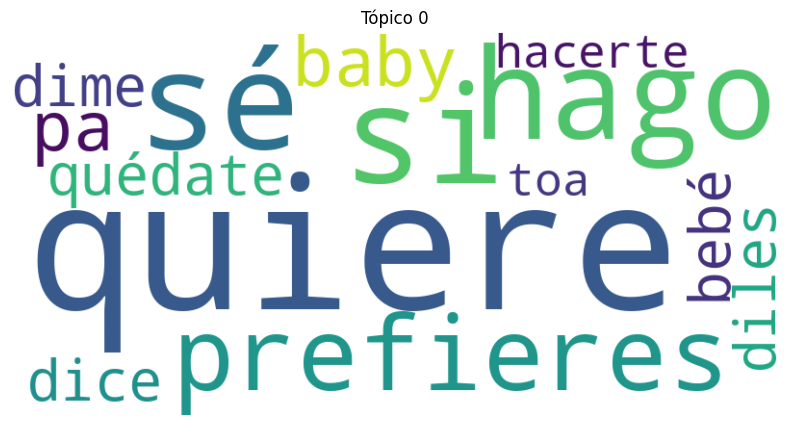

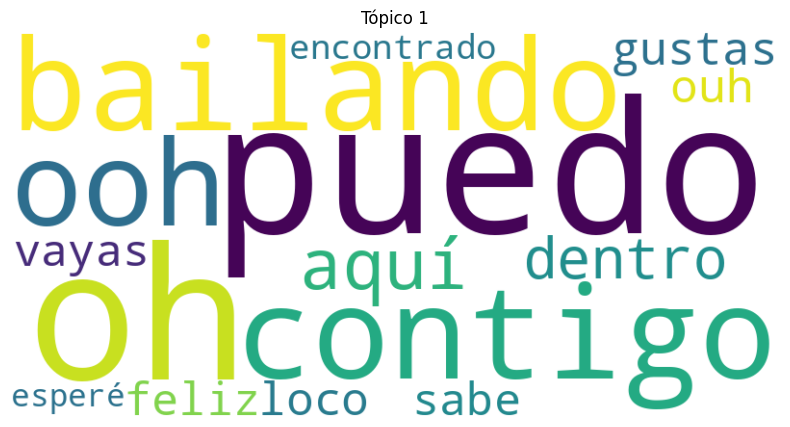

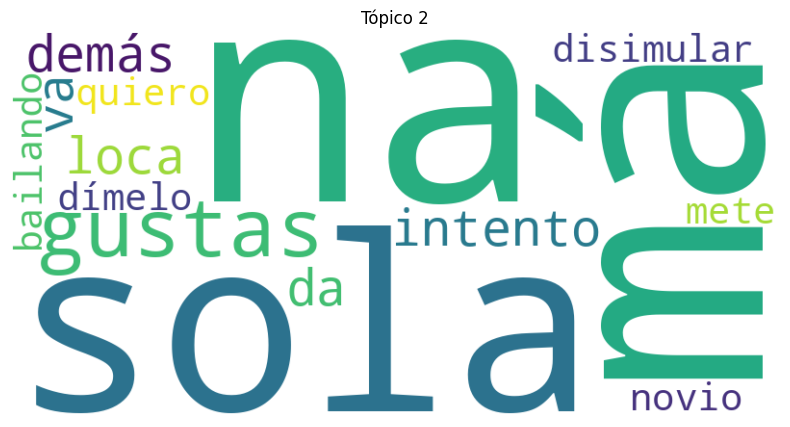

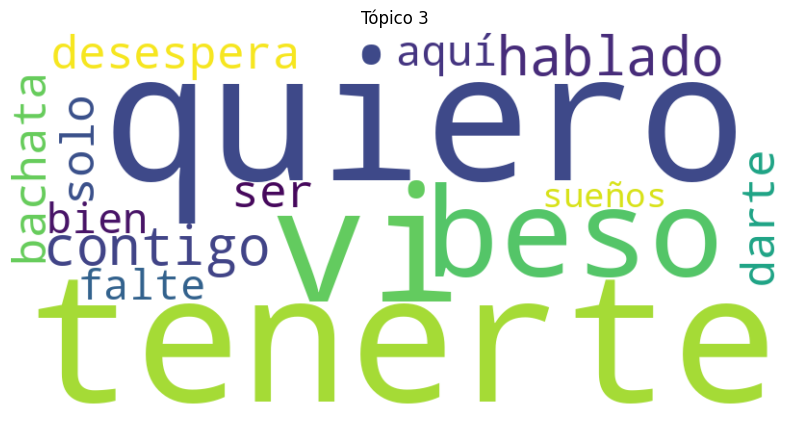

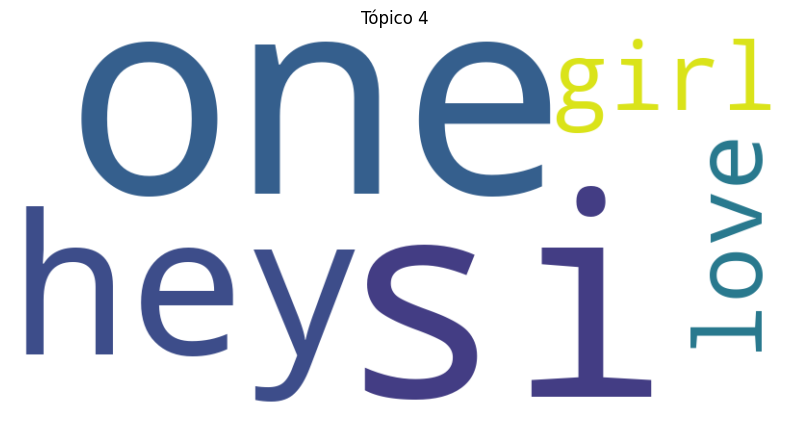

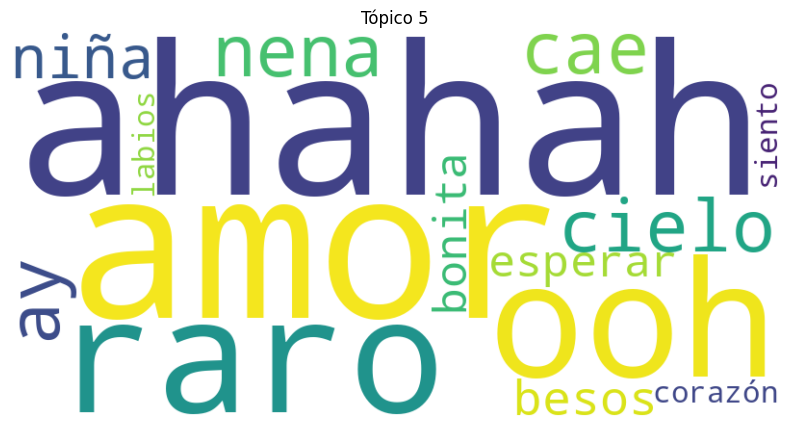

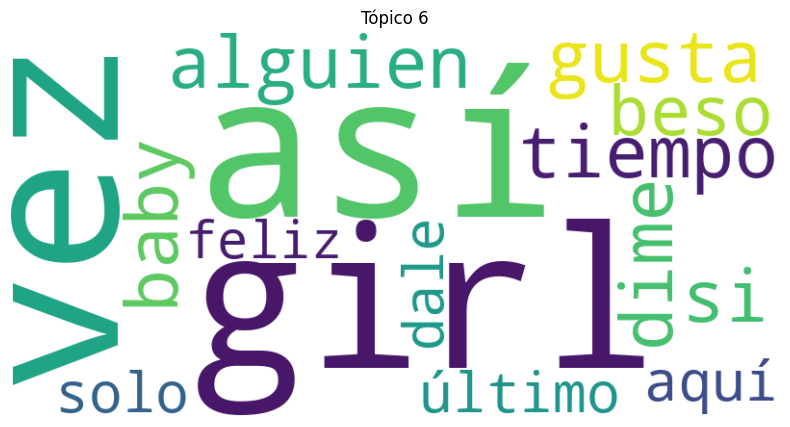

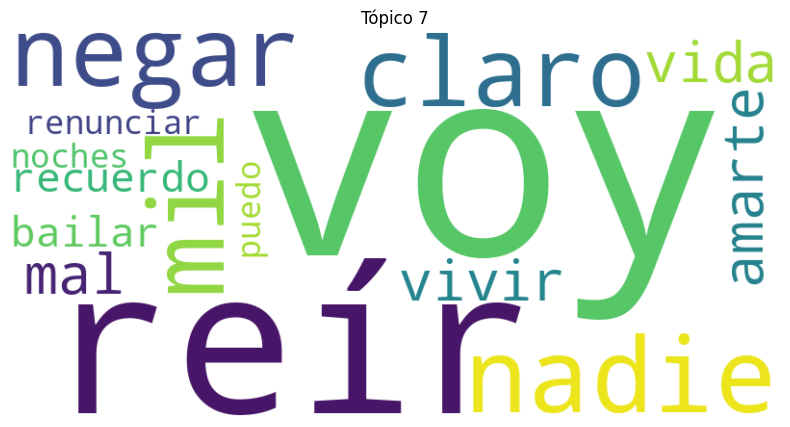

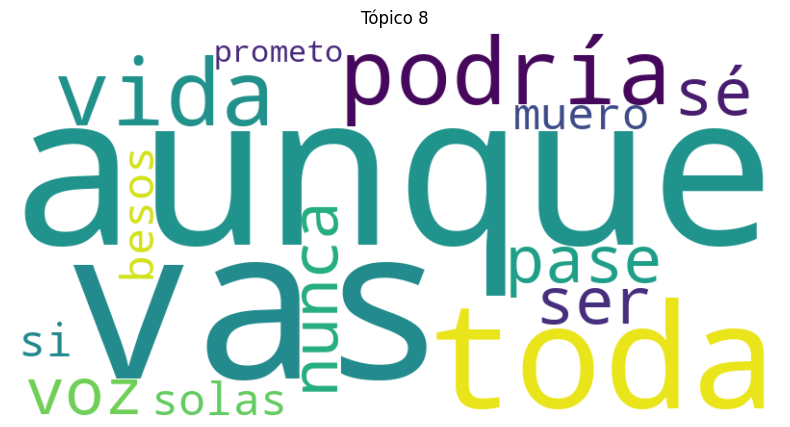

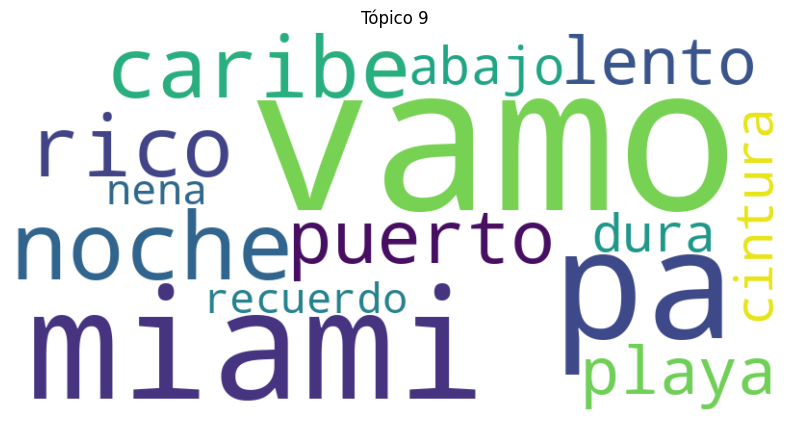

In [18]:
for topic_idx, keywords in topic_keywords.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)

    # Mostrar nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Tópico {topic_idx}")
    plt.show()

# **LDA**

##Modelado de tópicos usando LDA

In [19]:
n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=10, learning_method='online')
lda_topics = lda_model.fit_transform(tfidf_matrix)

##Extracción de palabras clave para cada tópico en LDA

In [20]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 15
lda_topic_keywords = {}

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Tópico {topic_idx}:")
    top_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(top_keywords)
    lda_topic_keywords[topic_idx] = top_keywords

Tópico 0:
amor buen prometo vi si cae dame cielo vida podría gracias aquí noche esperar toda
Tópico 1:
oh you and ooh contigo bachata puro the si pa digo lento amor quiero mirarte
Tópico 2:
vez besos enamore amor hoy da di decir háblame luz duro quema si noches má
Tópico 3:
déjame vamo pa miami caribe cuatro ves puerto quede hago merece pecho beso dos colombia
Tópico 4:
soñé corazón ser vienen si olvido amigo gente siempre quiero queda junto dile cositas van
Tópico 5:
enamorando recuerdo pa hoy decía sucedió camino quiero anoche pasando volvería todavía contigo rumba salir
Tópico 6:
así si sé vida baby quiero aquí dime aunque amor na ser dónde gusta ahora
Tópico 7:
quiero voy sé menea nunca vas claro loco corre girl cómo siempre reír bien voz
Tópico 8:
ahahah abajo amor raro pa así noche nena phillie vamos peleamos música dj shot ay
Tópico 9:
vaya foto flor nunca puedo haciendo aquella pasa plan cuidarla poquito invierno color llevé jardín


##Visualización de los tópicos con nubes de palabras en LDA

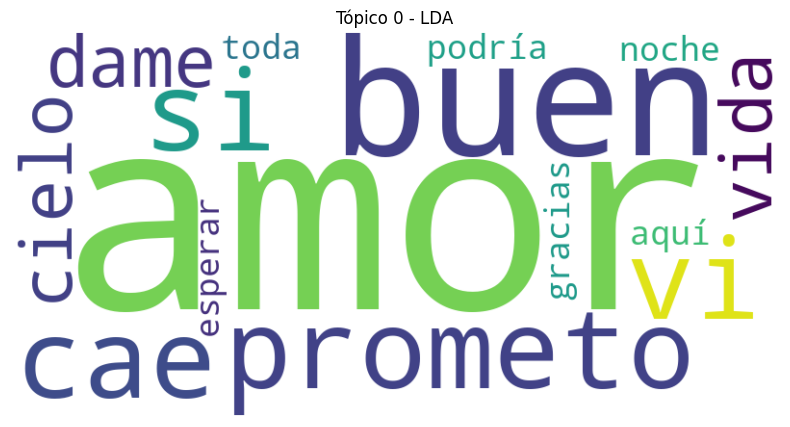

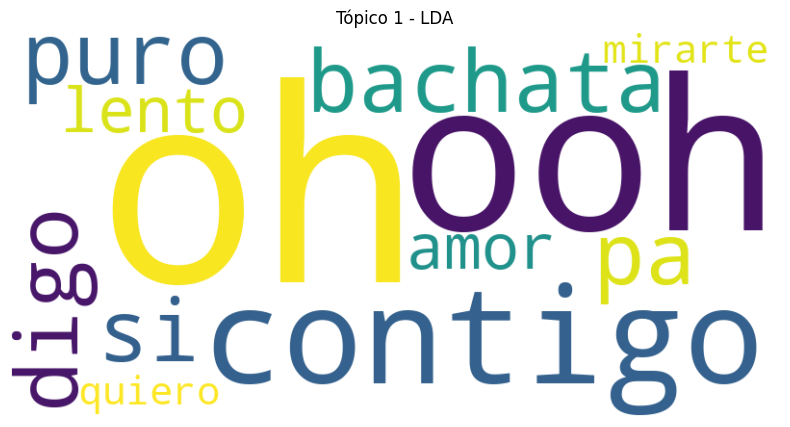

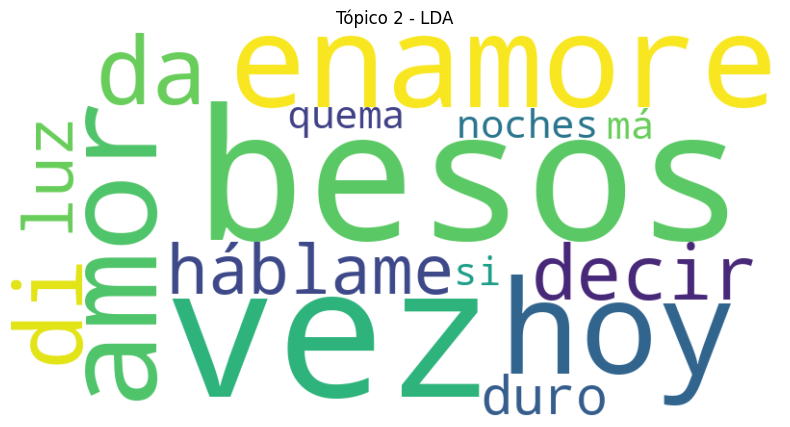

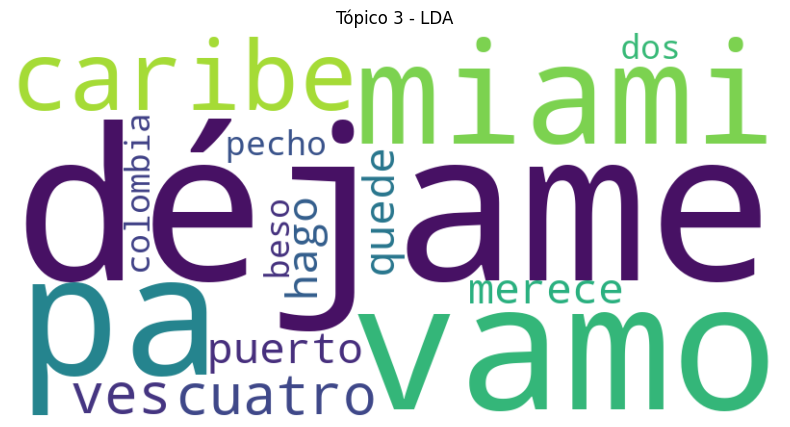

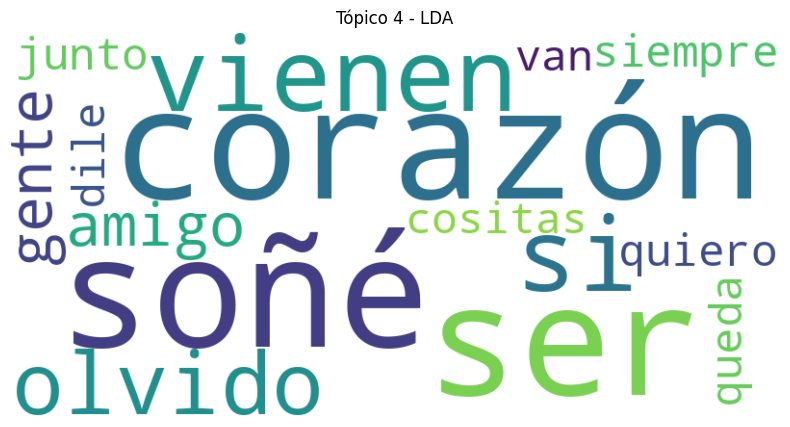

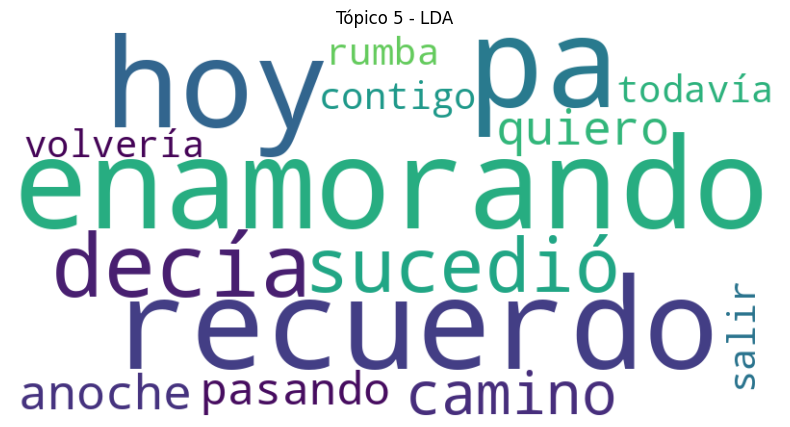

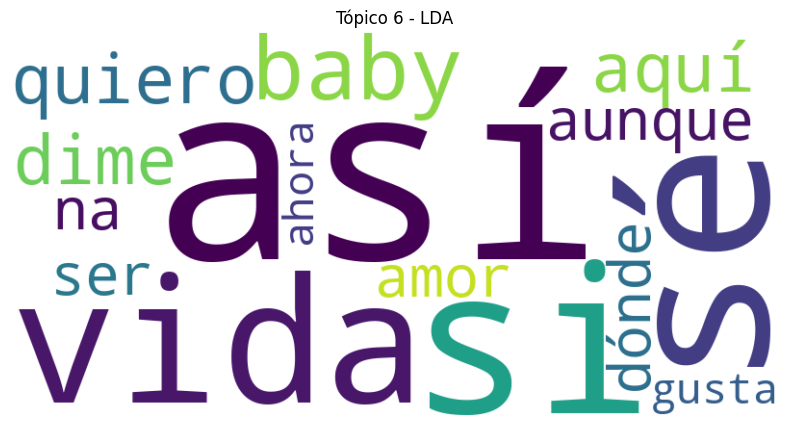

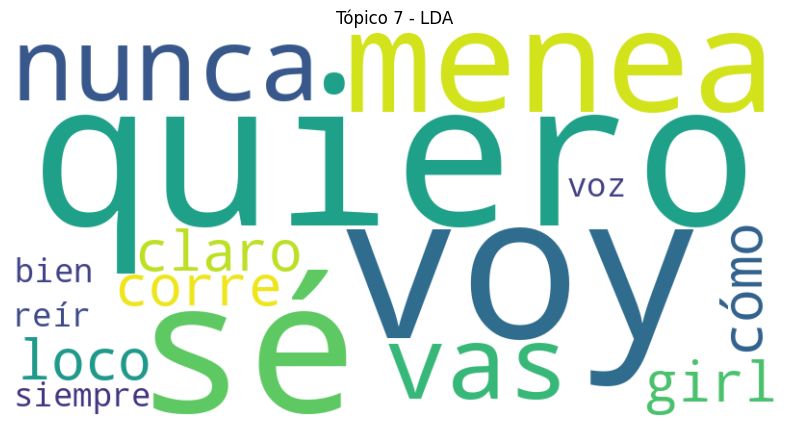

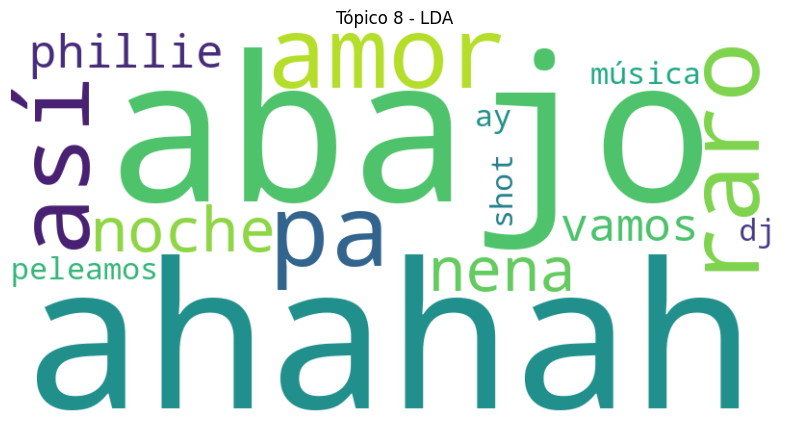

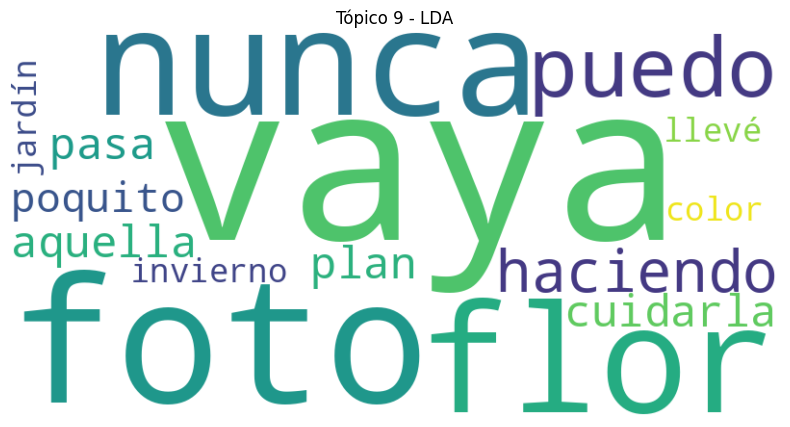

In [21]:
for topic_idx, keywords in lda_topic_keywords.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)

    # Mostrar nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Tópico {topic_idx} - LDA")
    plt.show()

In [22]:
# Obtener la pertenencia de cada documento a su tópico más representativo con NMF
doc_topic_nmf = nmf_model.transform(tfidf_matrix)
topic_most_pr_nmf = []

for n in range(doc_topic_nmf.shape[0]):
    topic_most_pr_nmf.append(doc_topic_nmf[n].argmax())

# Añadir los resultados al DataFrame
df['nmf_topic'] = topic_most_pr_nmf

# Ver el DataFrame con la columna de tópicos más representativos
df_nmf_topics = df[['Letra', 'nmf_topic']]
display(df_nmf_topics)


,Letra,nmf_topic
0,"D, d, d\nAsí hasta abajo soy yo (D, d, d, D. O...",9
1,Richi peña\nChino y nacho\nEsta cancion nació ...,5
2,La esperanza se marchó\nMas bien me abandonó\n...,5
3,Bahía Azulada)\nNo llores por él\n(No llores p...,5
4,"Hola que tal, como estas? que te trae por aqui...",6
...,...,...
95,"Se acostó temprano, mañana hay que estudiar (e...",6
96,"Once de la noche, todavía no contesta\nUna de ...",0
97,¿Qué pasó contigo?\nDímelo\n(O-O-Ovy On The Dr...,4
98,(Esto vamo' a arrancarlo con altura)\nEl dembo...,9


In [23]:
import spacy
spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")

# Preparar el texto eliminando partes no deseadas
preparado = []
for texto in df['Letra_limpia']:
    doc = nlp(texto)
    preparado.append([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']])

# Preparar el diccionario y el corpus para gensim
import gensim
import gensim.corpora as corpora

id2word = corpora.Dictionary(preparado)
corpus = [id2word.doc2bow(element) for element in preparado]


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
from gensim.models import CoherenceModel

coherencias = []
for topicos in range(1, 11):
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=topicos, random_state=100, update_every=1, chunksize=40, passes=10, alpha='auto', per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=preparado, dictionary=id2word, coherence='c_v')
    coherencias.append(coherence_model_lda.get_coherence())

# Imprimir las coherencias
print(coherencias)

# El número óptimo de tópicos basado en la coherencia puede ser elegido en función de los resultados


[0.4271511831122047, 0.37100235849050534, 0.28959888636905745, 0.3039334100676601, 0.29506881646937133, 0.2859896315605333, 0.3184680218067535, 0.29910961601840547, 0.34465683926696694, 0.3258460098817447]


In [30]:
# In your LDA model training (ipython-input-25-3016af4bddfa), change num_topics to a value greater than 1
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, # Changed num_topics to 5 (or any value > 1)
                                   random_state=100, update_every=1, chunksize=40,
                                   passes=10, alpha='auto', per_word_topics=True)
# Ver los tópicos generados
from pprint import pprint
pprint(lda_model.print_topics())

# Asignar tópicos a cada documento
doc_lda = lda_model[corpus]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"amor" + 0.016*"decir" + 0.014*"pasar" + 0.012*"gusta" + '
  '0.012*"pensar" + 0.010*"dimir" + 0.009*"así" + 0.009*"vida" + 0.008*"puro" '
  '+ 0.008*"querer"'),
 (1,
  '0.010*"decir" + 0.009*"solo" + 0.009*"olvido" + 0.007*"dar" + 0.007*"dejar" '
  '+ 0.006*"amar" + 0.006*"saber" + 0.006*"ahora" + 0.006*"nunca" + '
  '0.006*"punto"'),
 (2,
  '0.019*"saber" + 0.013*"noche" + 0.012*"querer" + 0.009*"día" + '
  '0.009*"decir" + 0.009*"rato" + 0.009*"lento" + 0.008*"meneo" + 0.008*"ver" '
  '+ 0.007*"bailar"'),
 (3,
  '0.040*"querer" + 0.019*"saber" + 0.018*"ver" + 0.014*"hacer" + 0.012*"girl" '
  '+ 0.012*"solo" + 0.011*"bailar" + 0.010*"poompoom" + 0.008*"bien" + '
  '0.008*"baby"'),
 (4,
  '0.021*"ver" + 0.019*"hacer" + 0.019*"querer" + 0.019*"saber" + 0.018*"así" '
  '+ 0.017*"altura" + 0.014*"aquí" + 0.011*"noche" + 0.010*"dar" + '
  '0.010*"mejor"')]


In [26]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.2 MB/s eta 0:00:00


In [27]:
!pip install -U pyLDAvis
!pip install -U gensim


In [31]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Habilitar visualización en notebook (si estás usando Jupyter o Google Colab)
pyLDAvis.enable_notebook()

# Generar visualización
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='pcoa')
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
